Implement a SIFT-based matching pipeline: (a) detect SIFT keypoints and descriptors in two images; (b) scale or rotate one image and revaluate features; (c) match descriptors using nearest-neighbour + ratio test; (d) evaluate the robustness of keypoints under transformations.

In [151]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [152]:
def scale_image(img, scale_factor):
    h, w = img.shape[:2]
    return cv2.resize(img, (int(w * scale_factor), int(h * scale_factor)))

def reflect_image(img):
    return cv2.flip(img, 1)  # Horizontal reflection

def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)

    # Rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Compute new bounding dimensions
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust rotation matrix to shift image to the center
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    # Perform rotation with new size
    return cv2.warpAffine(img, M, (new_w, new_h))

In [153]:
img_path1 = 'images/statue-1.jpg'

In [154]:
img= cv2.imread(img_path1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # grayscale for SIFT

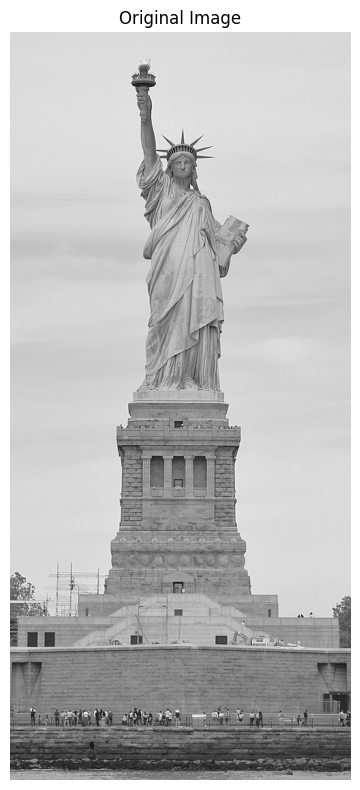

In [155]:
plt.figure(figsize=(8, 8)) 
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.tight_layout() 
plt.show()

In [156]:
sift = cv2.SIFT_create()
# Compute SIFT keypoints and descriptors for the original image
kp1, des1 = sift.detectAndCompute(img_gray, None)

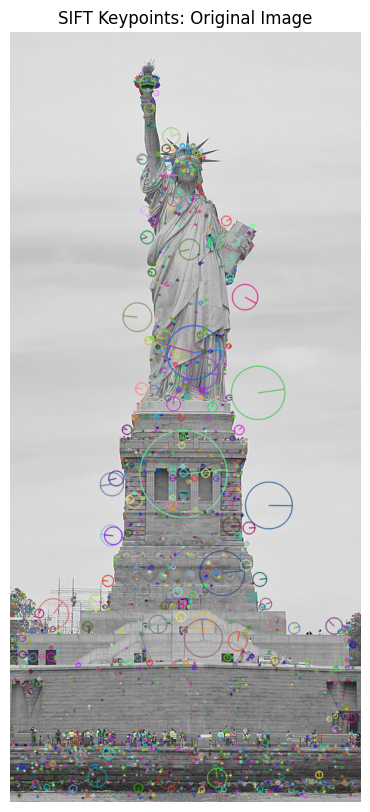

In [157]:
# Visualize SIFT keypoints on the original image
img_kp = cv2.drawKeypoints(img_gray, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 10))
plt.imshow(img_kp, cmap='gray')
plt.title('SIFT Keypoints: Original Image')
plt.axis('off')
plt.show()

**Applying Tranformations on the image**

Scaling 

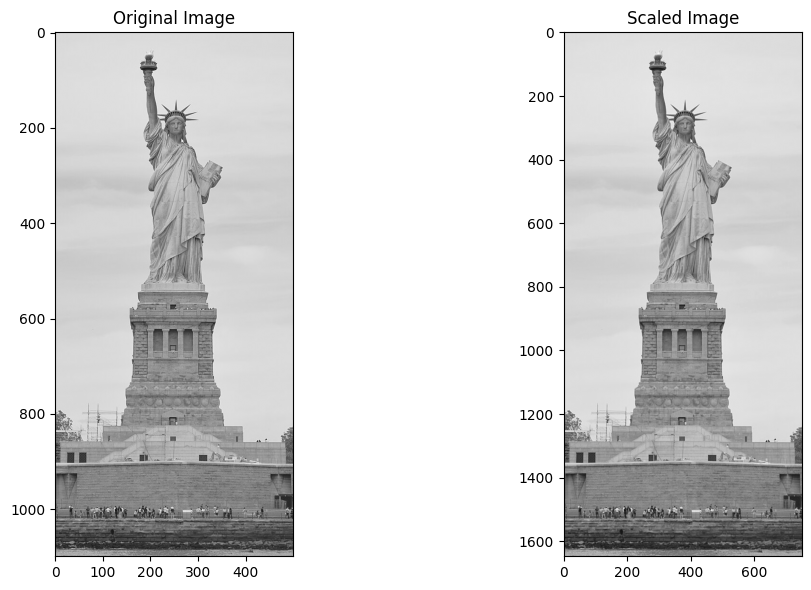

In [158]:
# Scale image by 1.5x
img_scaled = scale_image(img_gray, 1.5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('image')  # Shows actual pixel size

plt.subplot(1, 2, 2)
plt.imshow(img_scaled, cmap='gray')
plt.title('Scaled Image')
plt.axis('image')

plt.tight_layout()
plt.show()

In [159]:
print("Original shape:", img_gray.shape)
print("Scaled shape:", img_scaled.shape)

Original shape: (1099, 500)
Scaled shape: (1648, 750)


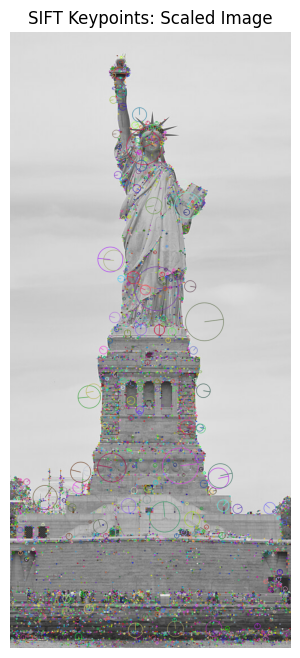

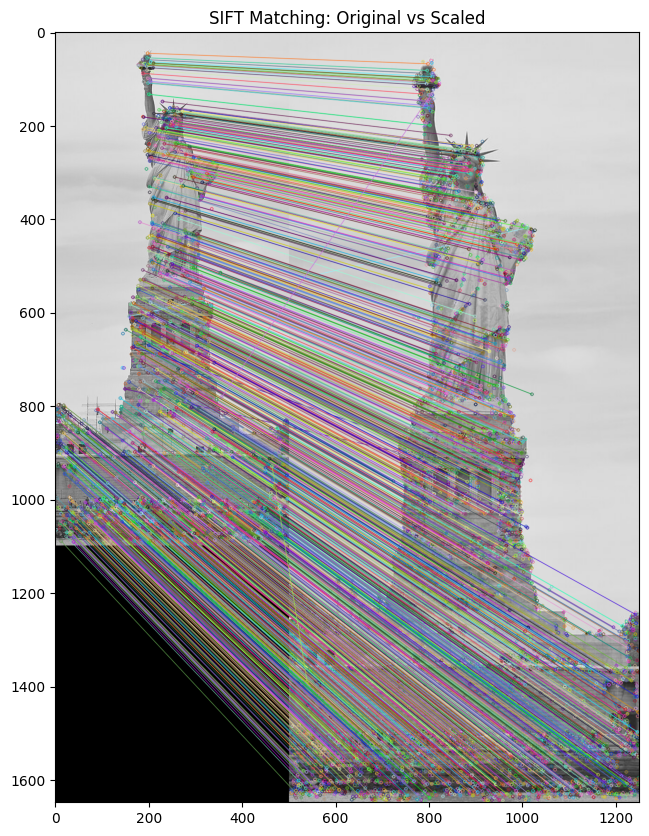

Robustness (Scaling): 63.25%


In [160]:
# SIFT on scaled image
bf = cv2.BFMatcher()
kp_scaled, des_scaled = sift.detectAndCompute(img_scaled, None)

# Match descriptors
matches = bf.knnMatch(des1, des_scaled, k=2)
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# Visualize SIFT keypoints on the scaled image
img_scaled_kp = cv2.drawKeypoints(img_scaled, kp_scaled, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(8, 8))
plt.imshow(img_scaled_kp, cmap='gray')
plt.title('SIFT Keypoints: Scaled Image')
plt.axis('off')
plt.show()

# Draw matches
matched_img = cv2.drawMatches(img_gray, kp1, img_scaled, kp_scaled, good_matches, None)
plt.figure(figsize=(20,10))
plt.imshow(matched_img)
plt.title("SIFT Matching: Original vs Scaled")
plt.axis('image')
plt.show()

# Robustness
robustness_scaling = (len(good_matches) / len(kp1)) * 100
print(f"Robustness (Scaling): {robustness_scaling:.2f}%")

Rotation

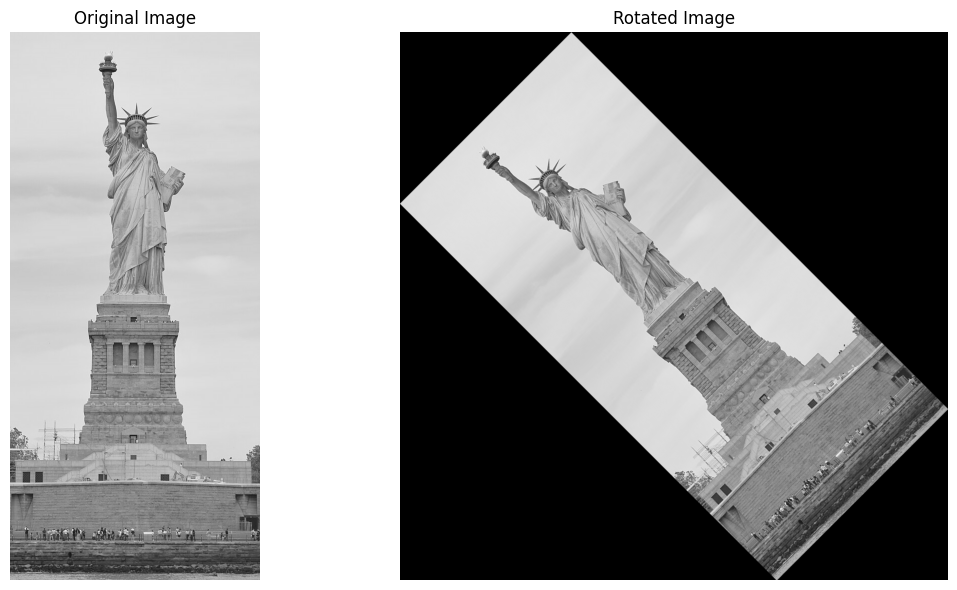

In [161]:
# Rotate image by 45 degrees
img_rotated = rotate_image(img_gray, 45)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rotated, cmap='gray') 
plt.title('Rotated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

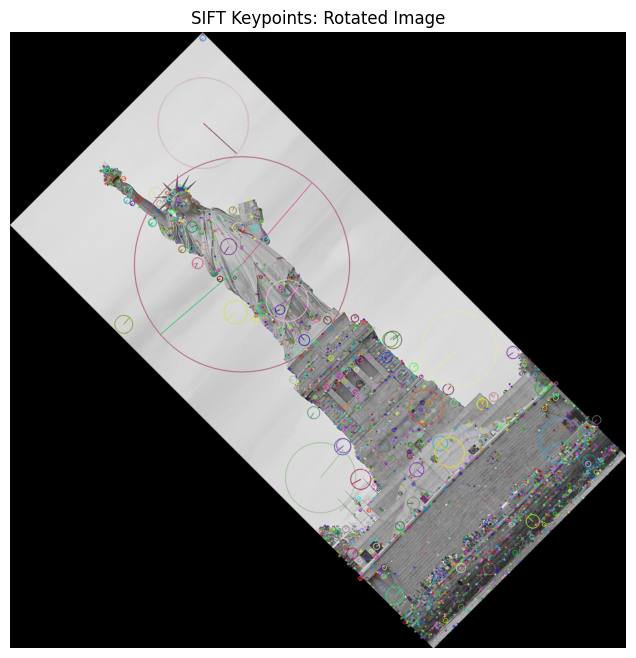

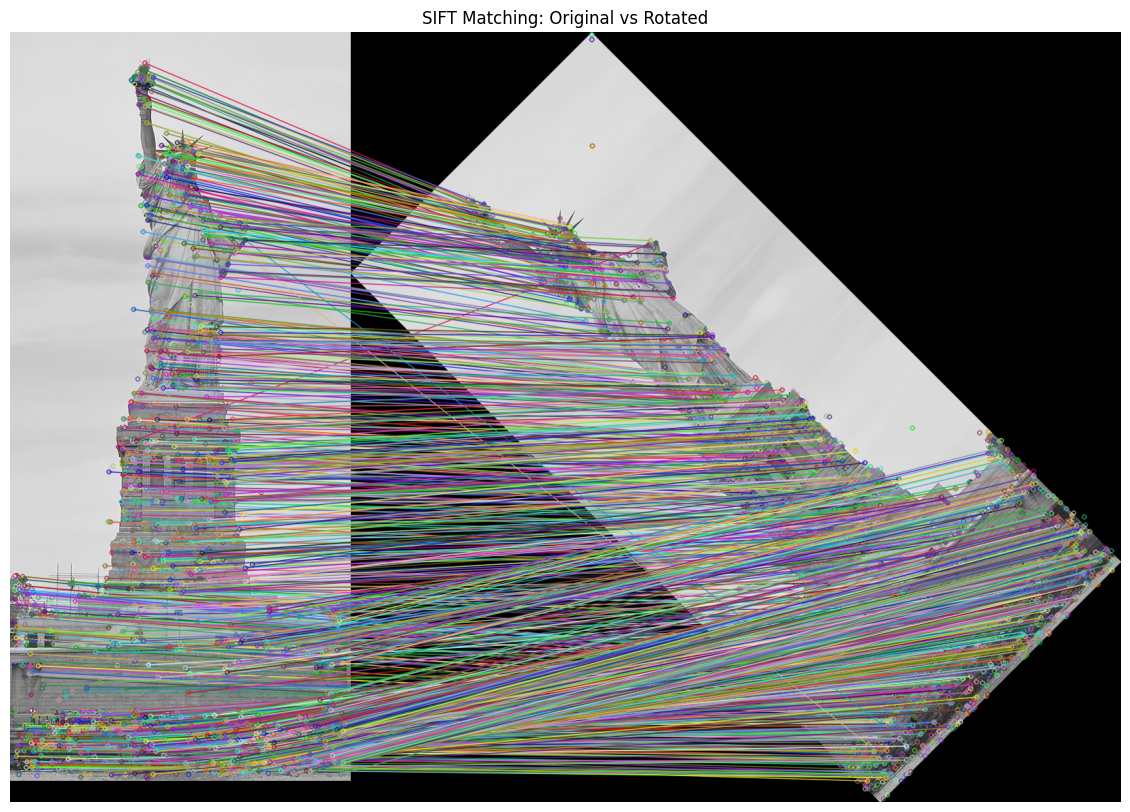

Robustness (Rotation): 65.23%


In [162]:
# SIFT on rotated image
kp_rot, des_rot = sift.detectAndCompute(img_rotated, None)

# Match descriptors
matches = bf.knnMatch(des1, des_rot, k=2)
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# Visualize SIFT keypoints on the rotated image
img_rotated_kp = cv2.drawKeypoints(img_rotated, kp_rot, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(8, 8))
plt.imshow(img_rotated_kp, cmap='gray')
plt.title('SIFT Keypoints: Rotated Image')
plt.axis('off')
plt.show()

# Draw matches
matched_img = cv2.drawMatches(img_gray, kp1, img_rotated, kp_rot, good_matches, None)
plt.figure(figsize=(20,10))
plt.imshow(matched_img)
plt.title("SIFT Matching: Original vs Rotated")
plt.axis('off')
plt.show()

# Robustness
robustness_rotation = (len(good_matches) / len(kp1)) * 100
print(f"Robustness (Rotation): {robustness_rotation:.2f}%")

Reflection

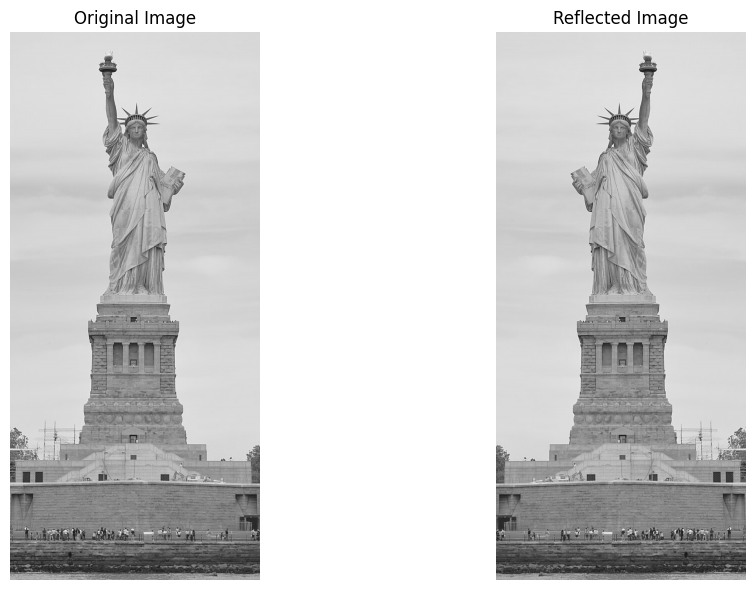

In [163]:
# Reflect image horizontally
img_reflected = reflect_image(img_gray)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_reflected, cmap='gray')
plt.title('Reflected Image')
plt.axis('off')

plt.tight_layout()
plt.show()

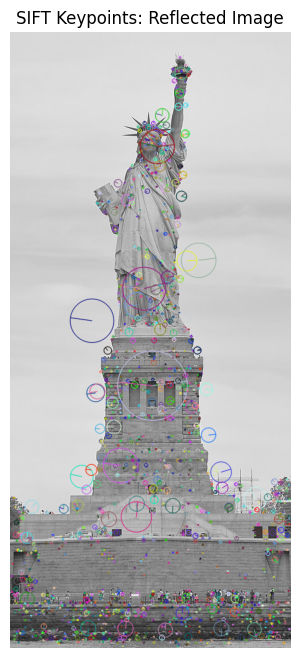

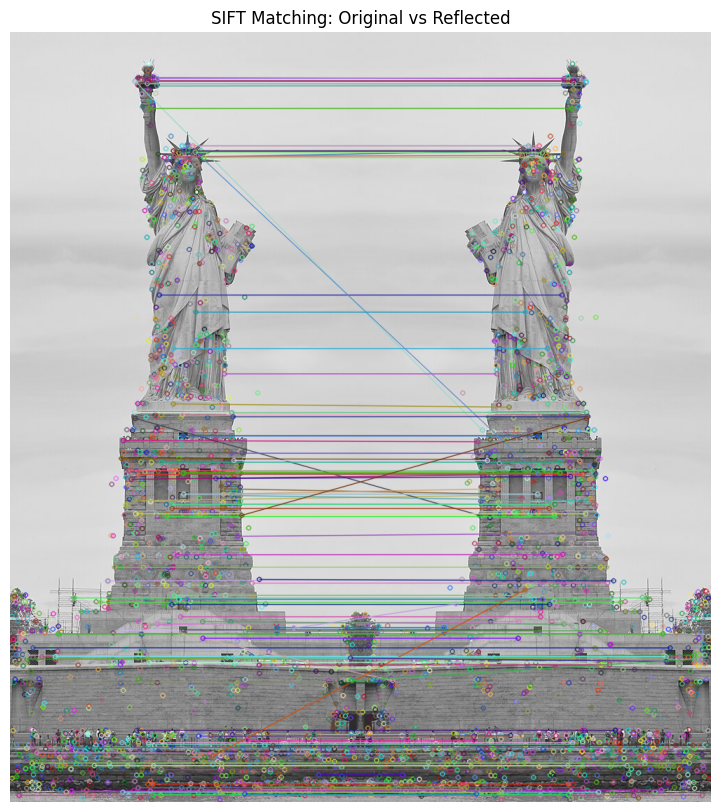

Robustness (Reflection): 7.73%


In [164]:
# SIFT on reflected image
kp_ref, des_ref = sift.detectAndCompute(img_reflected, None)

# Match descriptors
matches = bf.knnMatch(des1, des_ref, k=2)
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# Visualize SIFT keypoints on the reflected image
img_reflected_kp = cv2.drawKeypoints(img_reflected, kp_ref, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(8, 8))
plt.imshow(img_reflected_kp, cmap='gray')
plt.title('SIFT Keypoints: Reflected Image')
plt.axis('off')
plt.show()

# Draw matches
matched_img = cv2.drawMatches(img_gray, kp1, img_reflected, kp_ref, good_matches, None)
plt.figure(figsize=(20,10))
plt.imshow(matched_img)
plt.title("SIFT Matching: Original vs Reflected")
plt.axis('off')
plt.show()

# Robustness
robustness_reflection = (len(good_matches) / len(kp1)) * 100
print(f"Robustness (Reflection): {robustness_reflection:.2f}%")

In [165]:
# Summarize robustness results in a table
import pandas as pd

results = {
    "Transformation": ["Scaling", "Rotation", "Reflection"],
    "Robustness (%)": [robustness_scaling, robustness_rotation, robustness_reflection]
}
df = pd.DataFrame(results)
print(df)

  Transformation  Robustness (%)
0        Scaling       63.249400
1       Rotation       65.227818
2     Reflection        7.733813
